In [6]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.dates as mdates

C:\Users\fremo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
time_series = pd.read_csv("C:/Users/fremo/Data Science/Final Project/NFTdata/NFT_Time_Series.csv")
time_series.rename(columns = {'Date':'ds', 'Sales_USD':'y'}, inplace = True)
time_series.head()

,ds,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,y,Number_of_Sales,Active_Market_Wallets,Primary_Sales
0,2017-06-22,0.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-06-23,1020.30,19,8.0,0,19.0,53.70,1020.30,19.0,8.0,0.0
2,2017-06-24,2261.14,40,21.0,0,21.0,56.53,1240.84,21.0,13.0,0.0
3,2017-06-25,2778.69,53,28.0,0,13.0,52.43,517.55,13.0,7.0,0.0
4,2017-06-26,3203.32,67,34.0,0,14.0,47.81,424.63,14.0,6.0,0.0


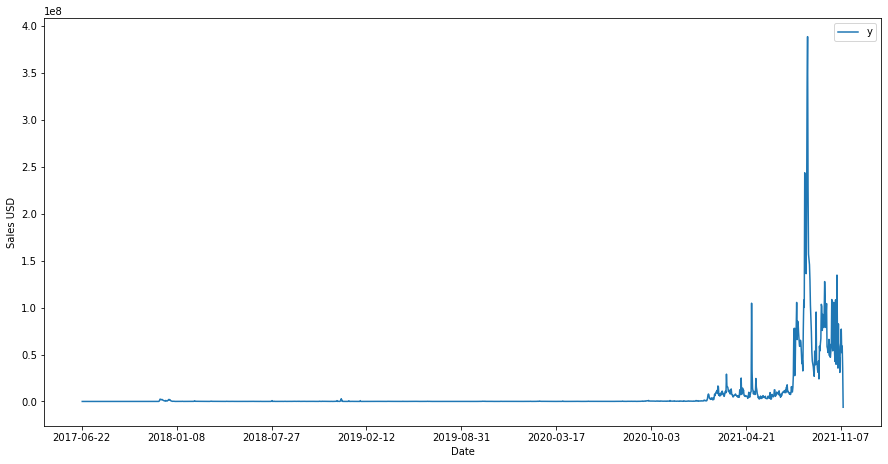

In [8]:
ax = time_series[['ds', 'y']].set_index('ds').plot(figsize=(15, 7.5))
ax.set_ylabel('Sales USD')
ax.set_xlabel('Date')

plt.show()

In [9]:
allData = time_series[['ds', 'y']]

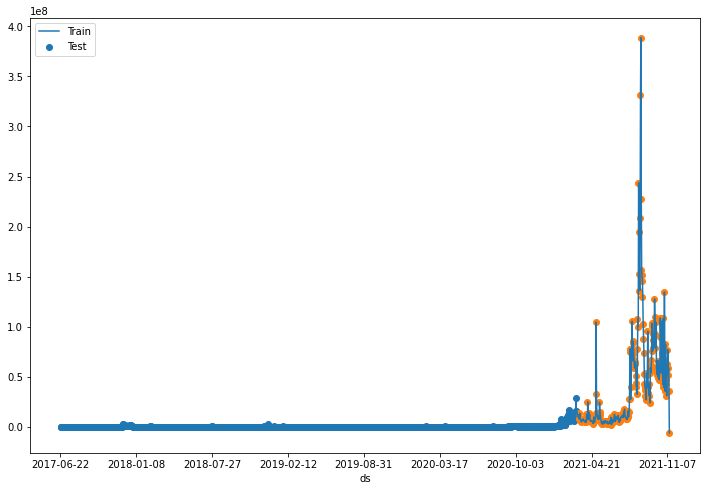

In [11]:
attrs = allData.ds
labels = allData.y

f_train, f_test, l_train, l_test = train_test_split(attrs, labels, test_size=0.15, shuffle=False)

train_data = pd.concat([f_train, l_train], axis=1)
test_data = pd.concat([f_test, l_test], axis=1)

ax = allData.set_index('ds').plot(figsize=(12, 8))
plt.scatter(f_train, l_train)
plt.scatter(f_test, l_test)
plt.legend(["Train", "Test"])

In [12]:
model = Prophet(interval_width=0.95)
model.fit(train_data)

future = model.make_future_dataframe(periods=100)
#future = model.make_future_dataframe(periods=3, freq='MS')

forecast = model.predict(future)
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast

21:28:22 - cmdstanpy - INFO - Chain [1] start processing
21:28:22 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2017-06-22,4.210766e+05,-1.844707e+06,2.836221e+06
1,2017-06-23,3.607867e+05,-1.966247e+06,2.820223e+06
2,2017-06-24,3.416523e+05,-1.968257e+06,2.996137e+06
3,2017-06-25,4.077513e+05,-2.023605e+06,2.658944e+06
4,2017-06-26,3.941948e+05,-1.980541e+06,2.762997e+06
...,...,...,...,...
1459,2021-06-20,7.272908e+06,4.940945e+06,9.951016e+06
1460,2021-06-21,7.277089e+06,4.744213e+06,9.583096e+06
1461,2021-06-22,7.247395e+06,5.032397e+06,9.865566e+06
1462,2021-06-23,7.216968e+06,4.925933e+06,9.776426e+06


In [14]:
forecast.ds = pd.to_datetime(forecast.ds)
allData.ds = pd.to_datetime(allData.ds)

C:\Users\fremo\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [22]:
forecast = forecast[['ds', 'yhat']]

In [23]:
newGraph = pd.merge_asof(allData,forecast)

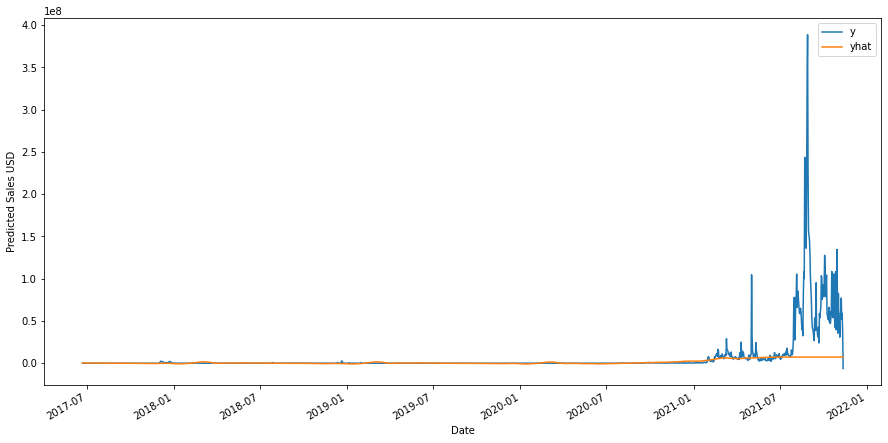

In [25]:
ax = newGraph.set_index('ds').plot(figsize=(15, 7.5))
ax.set_ylabel('Predicted Sales USD')
ax.set_xlabel('Date')

plt.show()

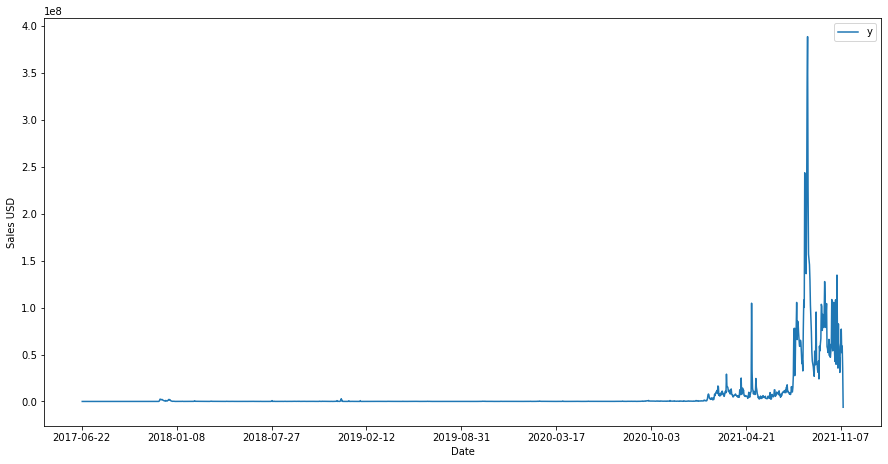

In [26]:
ax = time_series[['ds', 'y']].set_index('ds').plot(figsize=(15, 7.5))
ax.set_ylabel('Sales USD')
ax.set_xlabel('Date')

plt.show()

In [40]:
col = ['Date','Number_of_sales', 'Active_markets_wallets','Primary_sales','ETH_high_price','Sales_USD']

permalink = 'https://raw.githubusercontent.com/eroskopf/NFTPricePred/main/data/prediction.csv'

hold = pd.read_csv(permalink)

In [41]:
hold

,Unnamed: 0,Date,Number_of_sales,Active_markets_wallets,Primary_sales,ETH_high_price,Sales_USD
0,0,2017-11-09,1.482700e+02,2.0,0.0,0.0,329.451996
1,1,2017-11-10,0.000000e+00,0.0,0.0,0.0,324.717987
2,2,2017-11-11,0.000000e+00,0.0,0.0,0.0,319.453003
3,3,2017-11-12,9.111000e+01,1.0,0.0,0.0,319.153015
4,4,2017-11-13,6.307000e+01,2.0,2.0,0.0,328.415009
...,...,...,...,...,...,...,...
1461,1461,2021-11-08,7.706698e+07,59264.0,NaN,44435.0,4822.363281
1462,1462,2021-11-09,5.197508e+07,50879.0,NaN,32156.0,4837.589355
1463,1463,2021-11-10,5.901034e+07,44822.0,NaN,27694.0,4859.502930
1464,1464,2021-11-11,3.554317e+07,13935.0,NaN,7808.0,4778.059082


In [42]:
hold = hold.drop(columns = ['Unnamed: 0','Number_of_sales','Active_markets_wallets','Active_markets_wallets','Primary_sales'])

In [46]:
hold.rename(columns = {'Date':'ds'}, inplace = True)
hold

,ds,ETH_high_price,Sales_USD
0,2017-11-09,0.0,329.451996
1,2017-11-10,0.0,324.717987
2,2017-11-11,0.0,319.453003
3,2017-11-12,0.0,319.153015
4,2017-11-13,0.0,328.415009
...,...,...,...
1461,2021-11-08,44435.0,4822.363281
1462,2021-11-09,32156.0,4837.589355
1463,2021-11-10,27694.0,4859.502930
1464,2021-11-11,7808.0,4778.059082


In [48]:
hold.ds = pd.to_datetime( hold.ds)
time_series.ds = pd.to_datetime(time_series.ds)

In [51]:
spike = pd.merge_asof(hold,time_series[['ds', 'y']])

In [53]:
spike

,ds,ETH_high_price,Sales_USD,y
0,2017-11-09,0.0,329.451996,1.482700e+02
1,2017-11-10,0.0,324.717987,0.000000e+00
2,2017-11-11,0.0,319.453003,0.000000e+00
3,2017-11-12,0.0,319.153015,9.111000e+01
4,2017-11-13,0.0,328.415009,6.307000e+01
...,...,...,...,...
1461,2021-11-08,44435.0,4822.363281,7.706698e+07
1462,2021-11-09,32156.0,4837.589355,5.197508e+07
1463,2021-11-10,27694.0,4859.502930,5.901034e+07
1464,2021-11-11,7808.0,4778.059082,3.554317e+07


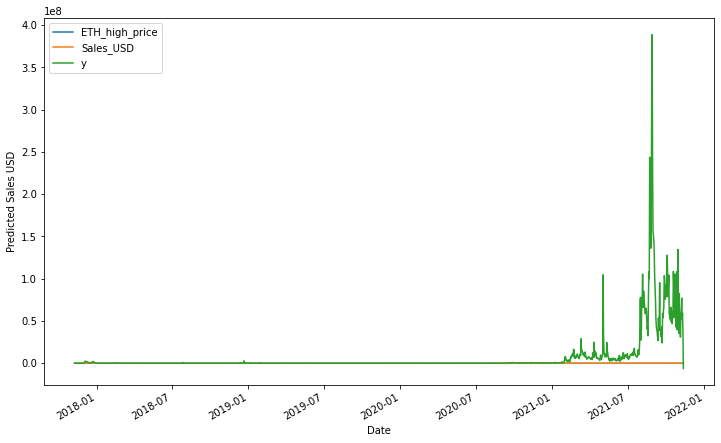

In [52]:
ax = spike.set_index('ds').plot(figsize=(12, 7.5))
ax.set_ylabel('Predicted Sales USD')
ax.set_xlabel('Date')

plt.show()

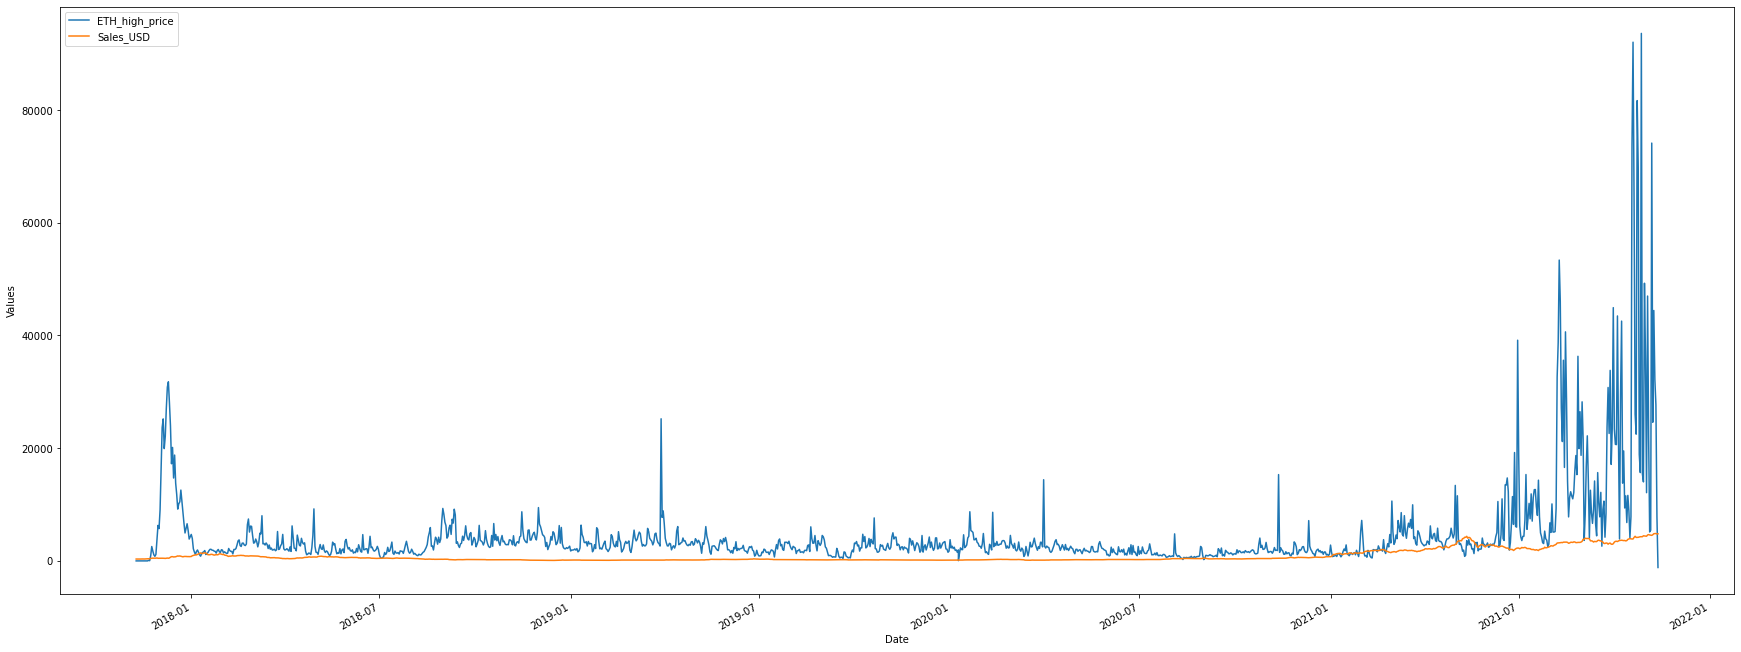

In [58]:
ax = hold.set_index('ds').plot(figsize=(30, 12))
ax.set_ylabel('Values')
ax.set_xlabel('Date')

plt.show()